In [1]:
import pickle
import sys
import os
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import ProcessPoolExecutor
import multiprocessing
import pandas as pd

# Get the parent directory and add it to sys.path
parent_dir = os.path.abspath(os.path.join(os.path.dirname("./"), '..'))
sys.path.append(parent_dir)

from src.analysis import analyze_sentiment, analyze_sentiment_dataframe_add_column

Now import the [pkl](https://pkl-lang.org/) file which contains our data. The preview is below.

In [2]:
# file_path = './data/motley-fool-data.pkl'
file_path = './data/sentiment.pkl'

# Open the file in binary read mode
with open(file_path, 'rb') as file:
    data = pickle.load(file)

data

,date,exchange,q,ticker,transcript,sentiment,sentiment_bin
0,"Aug 27, 2020, 9:00 p.m. ET",NASDAQ: BILI,2020-Q2,BILI,"Prepared Remarks:\nOperator\nGood day, and wel...",0.106681,0.10
1,"Jul 30, 2020, 4:30 p.m. ET",NYSE: GFF,2020-Q3,GFF,Prepared Remarks:\nOperator\nThank you for sta...,0.156814,0.16
2,"Oct 23, 2019, 5:00 p.m. ET",NASDAQ: LRCX,2020-Q1,LRCX,Prepared Remarks:\nOperator\nGood day and welc...,0.136402,0.13
3,"Nov 6, 2019, 12:00 p.m. ET",NASDAQ: BBSI,2019-Q3,BBSI,"Prepared Remarks:\nOperator\nGood day, everyon...",0.120524,0.11
4,"Aug 7, 2019, 8:30 a.m. ET",NASDAQ: CSTE,2019-Q2,CSTE,Prepared Remarks:\nOperator\nGreetings and wel...,0.137769,0.13
...,...,...,...,...,...,...,...
18750,"Nov 9, 2021, 1:00 p.m. ET",NYSE: SWX,2021-Q3,SWX,Prepared Remarks:\nOperator\nLadies and gentle...,0.126924,0.12
18751,"Nov 18, 2021, 12:00 p.m. ET",NYSE: PNNT,2021-Q4,PNNT,"Prepared Remarks:\nOperator\nGood morning, and...",0.176635,0.17
18752,"Feb 08, 2022, 11:00 a.m. ET",NYSE: TDG,2022-Q1,TDG,Prepared Remarks:\nOperator\nThank you for sta...,0.148412,0.14
18753,"Feb 28, 2022, 4:30 p.m. ET",NASDAQ: DVAX,2021-Q4,DVAX,"Prepared Remarks:\nOperator\nGood day, ladies ...",0.142668,0.13


We are going to want to do a couple of things with this transcript data.

1. Semantic Analysis Distribution. We will want to see what the feeling of all of the calls are.
2. Semantic Analysis of Companies over time.
3. Semantic Categorization.
4. View of Semantics Data Compared Against Numerical Data.
5. Summarize the development of a company over time.

## Semantic Analysis Distribution

We want to identify the earnings calls, on a scale of positive (1) to negative (-1), based on a general semantic analysis of the text.
To start, we will observe a simple call to `analyze_sentiment` from analysis.

In [3]:
# Run analyze sentiment on first transcript. This will return the general sentiment (from positive to negative) as a floating point
analyze_sentiment(data.iloc[0]['transcript'])

0.10668118727801024

We will now do this across all the transcripts. While we could repeat our steps manually from above for every data frame, analysis provides functions to do this for us. We can use the `analyze_sentiment_dataframe_add_column` function which will allow us to save the results in the dataframe. This will take a couple minutes.

In [4]:
# data_new = analyze_sentiment_dataframe_add_column(data, 'transcript', progress=True)
data_new = data
data_new

,date,exchange,q,ticker,transcript,sentiment,sentiment_bin
0,"Aug 27, 2020, 9:00 p.m. ET",NASDAQ: BILI,2020-Q2,BILI,"Prepared Remarks:\nOperator\nGood day, and wel...",0.106681,0.10
1,"Jul 30, 2020, 4:30 p.m. ET",NYSE: GFF,2020-Q3,GFF,Prepared Remarks:\nOperator\nThank you for sta...,0.156814,0.16
2,"Oct 23, 2019, 5:00 p.m. ET",NASDAQ: LRCX,2020-Q1,LRCX,Prepared Remarks:\nOperator\nGood day and welc...,0.136402,0.13
3,"Nov 6, 2019, 12:00 p.m. ET",NASDAQ: BBSI,2019-Q3,BBSI,"Prepared Remarks:\nOperator\nGood day, everyon...",0.120524,0.11
4,"Aug 7, 2019, 8:30 a.m. ET",NASDAQ: CSTE,2019-Q2,CSTE,Prepared Remarks:\nOperator\nGreetings and wel...,0.137769,0.13
...,...,...,...,...,...,...,...
18750,"Nov 9, 2021, 1:00 p.m. ET",NYSE: SWX,2021-Q3,SWX,Prepared Remarks:\nOperator\nLadies and gentle...,0.126924,0.12
18751,"Nov 18, 2021, 12:00 p.m. ET",NYSE: PNNT,2021-Q4,PNNT,"Prepared Remarks:\nOperator\nGood morning, and...",0.176635,0.17
18752,"Feb 08, 2022, 11:00 a.m. ET",NYSE: TDG,2022-Q1,TDG,Prepared Remarks:\nOperator\nThank you for sta...,0.148412,0.14
18753,"Feb 28, 2022, 4:30 p.m. ET",NASDAQ: DVAX,2021-Q4,DVAX,"Prepared Remarks:\nOperator\nGood day, ladies ...",0.142668,0.13


In [5]:
data_new.to_pickle("./data/sentiment.pkl")

Now we can plot the distribution of our semantic analysis.

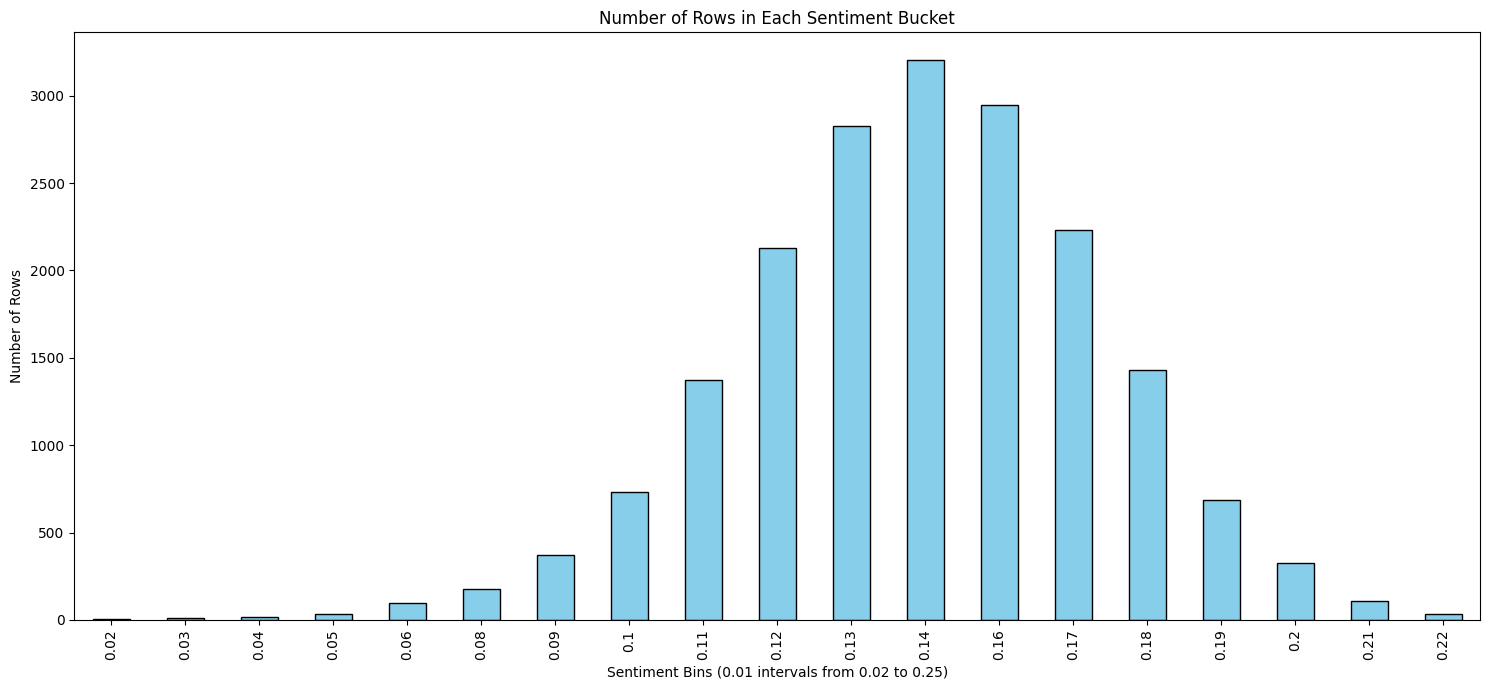

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_distribution(dataframe):
    num_frames = 20
    interval = (max(dataframe['sentiment']) - min(dataframe['sentiment']))/num_frames
    bins = np.arange(min(dataframe['sentiment']), max(dataframe['sentiment']), interval)
    labels = [round(b, 2) for b in bins[:-1]]  # Labels for x-axis
    
    # Bin the sentiment scores
    dataframe['sentiment_bin'] = pd.cut(
        dataframe['sentiment'],
        bins=bins,
        labels=labels,
        include_lowest=True,
        right=False
    )
    
    
    # Count the number of rows in each sentiment bucket
    counts = dataframe['sentiment_bin'].value_counts().sort_index()
    
    # Plot the column chart
    plt.figure(figsize=(15, 7))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    
    plt.xlabel(f"Sentiment Bins ({interval:.2f} intervals from {min(dataframe['sentiment']):.2f} to {max(dataframe['sentiment']):.2f})")
    plt.ylabel('Number of Rows')
    plt.title('Number of Rows in Each Sentiment Bucket')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

plot_distribution(data_new)

As we can see, the distribution is tight (because the semantics of earnings calls are relatively neutral). We will want to spread this according to this normal distribution such that the mean is 0 and $ 3\sigma $ is the bounds of at -1 and 1.

Original Data:
 0        0.106681
1        0.156814
2        0.136402
3        0.120524
4        0.137769
           ...   
18750    0.126924
18751    0.176635
18752    0.148412
18753    0.142668
18754    0.131268
Name: sentiment, Length: 18755, dtype: float64
Adjusted Data:
 0       -0.518865
1        0.084718
2       -0.161029
3       -0.352197
4       -0.144580
           ...   
18750   -0.275145
18751    0.323357
18752   -0.016434
18753   -0.085591
18754   -0.222847
Name: sentiment, Length: 18755, dtype: float64


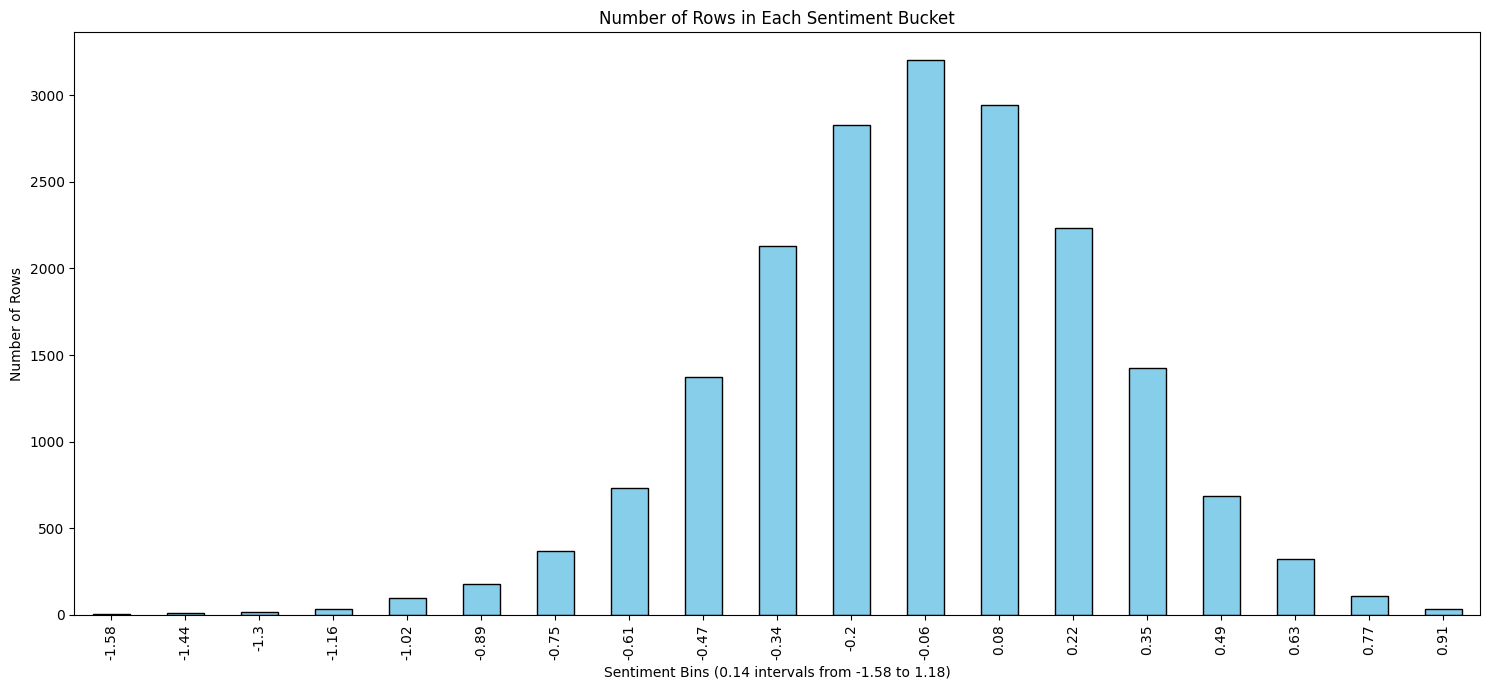

In [6]:
ds = data_new['sentiment']
# Step 1: Calculate mean and standard deviation
mean = ds.mean()
std = ds.std()

# Step 2: Adjust to center at 0 (subtract the mean)
centered_data = ds - mean

# Step 3: Scale so that ±3σ maps to -1 and 1
scaled_data = centered_data / (3 * std)

# Display the adjusted Series
print("Original Data:\n", ds)
print("Adjusted Data:\n", scaled_data)

data_adj = data_new.copy()
data_adj['sentiment'] = scaled_data 

plot_distribution(data_adj)

## Semantic Analysis of Companies Over Time
We may want to track the semantics of the companies earnings calls over time to get an understanding of the attitudes by company executives and investors. We can do this by simply doing some data manipulation.

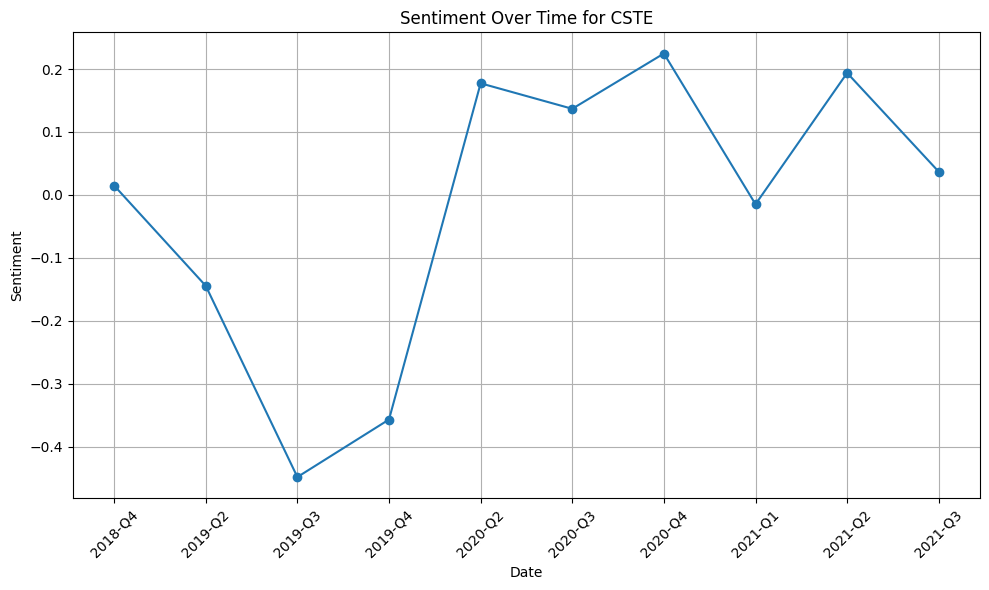

In [8]:
# Function to plot sentiment over time for a specific company
def plot_sentiment_over_time(df, company_ticker):
    company_data = df[df['ticker'] == company_ticker].sort_values(by='q')
    
    if company_data.empty:
        print(f"No data found for ticker {company_ticker}.")
        return
    
    plt.figure(figsize=(10, 6))
    plt.plot(company_data['q'], company_data['sentiment'], marker='o')
    plt.title(f"Sentiment Over Time for {company_ticker}")
    plt.xlabel("Date")
    plt.ylabel("Sentiment")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

company_df = data_adj.copy()

# Example: Plot sentiment over time for a specific company ticker, e.g., "BILI"
plot_sentiment_over_time(company_df, "CSTE")

## Semantic Categorization

Now we want to categorize each earnings call into a few buckets. We can pre-defined some categories in a list of perform basic embedding to extract the category for each of our transcripts.

*Note: This doesn't really work*

In [9]:
# Import embeddings 
from src.embedding import categorize

# Set environment variable to force console mode
os.environ["TQDM_NOTEBOOK"] = "0"

# Create categories, lets start with general industry
industry = ["Healthcare", "Technology", "Entertainment", "Education", "Construction", "Manufacturing", "Agriculture"]

df = data_adj.copy()
df = categorize(df, 'transcript', industry, result_col="industry")
df

KeyboardInterrupt: 

#### Let's see how we did
We can see how we did using the Yahoo Finance API

*Note: This doesn't work at all*

In [ ]:
import yfinance as yf
import time
w=0 
r=0
total = 100
r = 5
for i in range(total):
    ticker = str(df['ticker'].iloc[i*r])
    try:
        stock = yf.Ticker(ticker)
        info = stock.info
        if df['industry'].iloc[i*r] != info.get('sector'):
            w += 1
            print(str(ticker) + " Wrong: " + df['industry'].iloc[i*r] + " " + info.get('sector'))
        else:
            r += 1
            print(str(ticker) + " Right: " + df['industry'].iloc[i*r] + " " + info.get('sector'))
        time.sleep(0.1)  # Sleep to avoid rate limiting
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        continue

print(w / total)
print(r / total)

## Summarize the Development of a Company Over Time
Using the power of LLMs, we can figure out how a company has progressed over time. To do this, we'll want to use the `segmented_understanding` function in LLM_analysis. 

In [15]:
import random
df = data
# Select a random ticker from the 'ticker' column
random_ticker = random.choice(df['ticker'].unique())

# Filter data for the randomly selected ticker and sort by 'q'
company_data = df[df['ticker'] == random_ticker].sort_values(by='q')

company_data

,date,exchange,q,ticker,transcript,sentiment,sentiment_bin
5793,"Feb 06, 2020, 4:30 p.m. ET",NYSE: BILL,2020-Q2,BILL,"Prepared Remarks:\nOperator\nGood afternoon, a...",0.146755,0.14
7073,"May 07, 2020, 4:00 p.m. ET",NYSE: BILL,2020-Q3,BILL,Prepared Remarks:\nOperator\nGood afternoon an...,0.144946,0.14
6968,"Aug 27, 2020, 4:30 p.m. ET",NYSE: BILL,2020-Q4,BILL,"Prepared Remarks:\nOperator\nGood afternoon, a...",0.155398,0.14
3050,"Feb 4, 2021, 4:30 p.m. ET",NYSE: BILL,2021-Q2,BILL,"Prepared Remarks:\nOperator\nGood afternoon, a...",0.158877,0.16
7663,"May 6, 2021, 4:30 p.m. ET",NYSE: BILL,2021-Q3,BILL,"Prepared Remarks:\nOperator\nGood afternoon, a...",0.199525,0.19
11699,"Nov 4, 2021, 4:30 p.m. ET",NYSE: BILL,2021-Q3,BILL,"Prepared Remarks:\nOperator\nGood afternoon, a...",0.207782,0.20
12284,"Aug 26, 2021, 4:30 p.m. ET",NYSE: BILL,2021-Q4,BILL,Prepared Remarks:\nOperator\nGood afternoon an...,0.169797,0.17


Now that we have the transcripts for this company available over time, we'll want to setup the prompt correctly. First, we'll want to seed the API 

In [18]:
from src.LLM_analysis import summarize_many_texts, analyze_changes, initialize_llm

initialize_llm(api_key="YOUR API KEY HERE")

summaries = summarize_many_texts(company_data['transcript'])
summaries

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: YOUR API*****HERE. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

In [17]:
changes = analyze_changes(summaries, prompt="Describe the level of risk from the calls on a scale of 1 to 10 for each call") 
print(changes)

Based on the summaries provided, here is the level of risk from the calls on a scale of 1 to 10 for each call:

### Summary 1: Fiscal Q2 2020 Earnings Call
**Risk Level: 4**
- **Rationale**: This call marks Bill.com's first earnings call as a public company, which inherently carries some risk. However, the strong financial performance, significant market opportunity, and strategic partnerships indicate a solid foundation. The focus on R&D and customer growth mitigates some risk.

### Summary 2: Fiscal Q3 2020 Earnings Call
**Risk Level: 5**
- **Rationale**: The company adapted well to the COVID-19 pandemic, which is a positive sign. However, the mention of customer churn in severely impacted industries introduces uncertainty. The strong financial performance and customer growth are encouraging, but the economic conditions add a layer of risk.

### Summary 3: Q4 and Fiscal 2020 Earnings Call
**Risk Level: 3**
- **Rationale**: Bill.com demonstrated strong financial performance and custom

We can finally graph the changes from our summary to provide a visual element to our data

# Things to add
## Summarization Tree
Based on certain categories data is in, we can make a tree of summaries on top of each other
## Graph from unstructured
## Automatic Saving and Dataframe combining 
If we get a LLM request for a list of dataframes, we'll want to be able to save it.
## Cost assessment
Figure out from API calls how much it would cost based on input
## Easy way to manage hierarchical structure
GraphDB like Neo4j?
SQL Joins?
Other NoSQL?
## Do statistics on a subset of the data so that we don't have to do thousands of rows